In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob
import kagglehub

In [38]:
path = "./datasets/Testing"
print(path)

./datasets/Testing


In [39]:
numberIMG = {}
for dir in os.listdir(path):
    numberIMG[dir] = len(os.listdir(os.path.join(path,dir)))
numberIMG.items()

dict_items([('pituitary', 300), ('notumor', 405), ('glioma', 300), ('meningioma', 306)])

In [40]:
if not os.path.exists("./datasets/Validating"):
    os.mkdir("./datasets/Validating")

    for dir in os.listdir("./datasets/Testing"):
        os.makedirs("./datasets/Validating/"+dir)
        for img in np.random.choice(a = os.listdir(os.path.join("./datasets/Testing", dir)), size=(math.floor(0.5*numberIMG[dir])-2), replace=False ):
            o = os.path.join("./datasets/Testing", dir, img)
            d = os.path.join("./datasets/Validating",dir)
            shutil.copy(o,d)
            os.remove(o)
else:
    print("Folder exists")

In [26]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [63]:
# model
model = Sequential()

model.add(Conv2D(filters= 16, kernel_size= (3,3), activation= 'relu', input_shape=(224,224,3)))

model.add(Conv2D(filters= 36, kernel_size= (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 64, kernel_size= (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 128, kernel_size= (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate= 0.25))

model.add(Flatten())
model.add(Dense(units=64, activation= 'relu'))

model.add(Dropout(rate= 0.25))
model.add(Dense(units=4, activation= 'softmax'))

model.summary()



/Users/ritvijgopal/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 220, 220, 36)   │         5,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 110, 110, 36)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 108, 108, 64)   │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,638,440 (21.51 MB)

 Trainable params: 5,638,440 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [56]:
def prepeocessingIMG1(path):
    img_data = ImageDataGenerator(zoom_range= 0.2, shear_range= 0.2, rescale= 1/255, horizontal_flip= True)
    image = img_data.flow_from_directory(directory= path, target_size= (224,224), batch_size= 32, class_mode = 'categorical')

    return image

In [57]:

train_data = prepeocessingIMG1("./datasets/Training")

Found 5712 images belonging to 4 classes.


In [58]:
def prepeocessingIMG2(path):
    img_data = ImageDataGenerator(rescale= 1/255)
    image = img_data.flow_from_directory(directory= path, target_size= (224,224), batch_size= 32, class_mode = 'categorical')

    return image

In [59]:
path = "./datasets/Testing"
test_data = prepeocessingIMG2(path)

Found 664 images belonging to 4 classes.


In [60]:
path = "./datasets/Validating"
val_data = prepeocessingIMG2(path)

Found 647 images belonging to 4 classes.


In [66]:
# early stopping and model checkpoint
from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor="val_accuracy", min_delta= 0.01, patience= 5, verbose= 1, mode= 'auto')

#model checkpoint
mc = ModelCheckpoint(monitor="val_accuracy", filepath="./bestmodel.h5", verbose= 1, save_best_only= True, mode = 'auto')

cd = [es,mc]


In [67]:
hs = model.fit(
    x=train_data,
    steps_per_epoch=8,
    epochs=30,
    verbose=1,
    validation_data=val_data,
    validation_steps=16,
    callbacks=cd
)


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6895 - loss: 0.7384
Epoch 1: val_accuracy improved from -inf to 0.66602, saving model to ./bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.6914 - loss: 0.7367 - val_accuracy: 0.6660 - val_loss: 0.7547
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6713 - loss: 0.7478
Epoch 2: val_accuracy did not improve from 0.66602
8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.6774 - loss: 0.7436 - val_accuracy: 0.6016 - val_loss: 1.2660
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7216 - loss: 0.7896
Epoch 3: val_accuracy improved from 0.66602 to 0.76367, saving model to ./bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.7204 - loss: 0.7876 - val_accuracy: 0.7637 - val_loss: 0.6780
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7432 - loss: 0.6742
Epoch 4: val_accuracy did not improve from 0.76367
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.7439 - loss: 0.6696 - val_accuracy: 0.7031 - val_loss: 0.8005
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8066 - loss: 0.5781
Epoch 5: val_accuracy did not improve from 0.76367
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.8037 - loss: 0.5823 - val_accuracy: 0.7383 - val_loss: 0.7492
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7827 - loss: 0.6173
Epoch 6: val_accuracy improved from 0.76367 to 0.77930, saving model to ./bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.7799 - loss: 0.6175 - val_accuracy: 0.7793 - val_loss: 0.6343
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8102 - loss: 0.5362
Epoch 7: val_accuracy did not improve from 0.77930
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.8052 - loss: 0.5463 - val_accuracy: 0.6289 - val_loss: 1.0841
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7729 - loss: 0.6154
Epoch 8: val_accuracy did not improve from 0.77930
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.7721 - loss: 0.6142 - val_accuracy: 0.7578 - val_loss: 0.5993
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7041 - loss: 0.7378
Epoch 9: val_accuracy did not improve from 0.77930
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.7083 - loss: 0.7293 - val_accuracy: 0.7715 - val_loss: 0.6861
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8407 - loss: 0.4748
Epoch 10: val_accuracy did not improve from 0.77930
8/8 ━━━━━━━━━━━━━━

In [68]:
h = hs.history
h.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

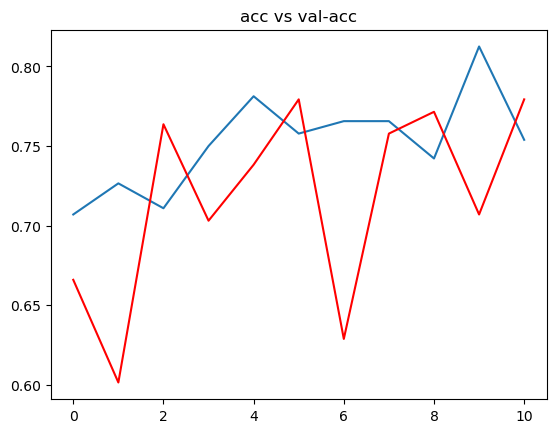

In [71]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c='red')

plt.title("acc vs val-acc")
plt.show()

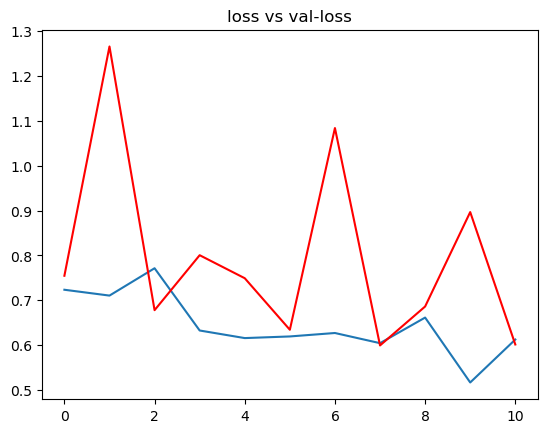

In [72]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c='red')

plt.title("loss vs val-loss")
plt.show()

In [73]:
from keras.models import load_model

In [77]:
model = load_model("./bestmodel.h5")

In [79]:
acc = model.evaluate(test_data)[1]

print(f"the accuracy is {acc*100} %")

/Users/ritvijgopal/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 408ms/step - accuracy: 0.7328 - loss: 0.7181
the accuracy is 74.69879388809204 %


In [80]:
from keras.preprocessing.image import load_img, img_to_array

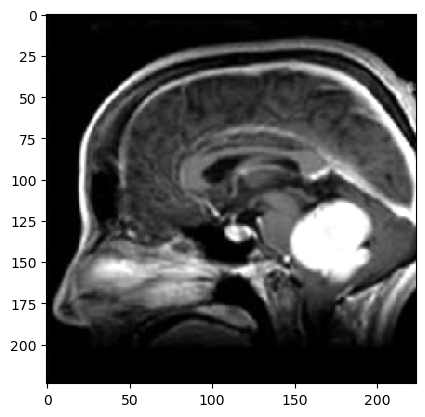

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Model predicted: meningioma


In [96]:
path = "datasets/Testing/meningioma/Te-me_0030.jpg"
img = load_img(path, target_size=(224,224))
input_array = img_to_array(img)/225

plt.imshow(input_array)
plt.show()

input_array.shape
input_array = np.expand_dims(input_array, axis=0)

pred = model.predict(input_array)[0]
predicted_index = np.argmax(pred)
index_to_class = {v: k for k, v in train_data.class_indices.items()}
predicted_label = index_to_class[predicted_index]

print("Model predicted:", predicted_label)
